In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.subplots as sp
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:\Users\richi\OneDrive\Desktop\DailyDelhiClimateTrain.csv',parse_dates=['date'],index_col='date')
df

meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01    10.000    84.500       0.000      1015.667
2013-01-02     7.400    92.000       2.980      1017.800
2013-01-03     7.167    87.000       4.633      1018.667
2013-01-04     8.667    71.333       1.233      1017.167
2013-01-05     6.000    86.833       3.700      1016.500
...              ...       ...         ...           ...
2016-12-28    17.217    68.043       3.548      1015.565
2016-12-29    15.238    87.857       6.000      1016.905
2016-12-30    14.095    89.667       6.267      1017.905
2016-12-31    15.053    87.000       7.325      1016.100
2017-01-01    10.000   100.000       0.000      1016.000

[1462 rows x 4 columns]

In [3]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

meantemp  humidity  wind_speed  meanpressure  year  month  day  \
date                                                                         
2013-01-01    10.000    84.500       0.000      1015.667  2013      1    1   
2013-01-02     7.400    92.000       2.980      1017.800  2013      1    2   
2013-01-03     7.167    87.000       4.633      1018.667  2013      1    3   
2013-01-04     8.667    71.333       1.233      1017.167  2013      1    4   
2013-01-05     6.000    86.833       3.700      1016.500  2013      1    5   

            dayofweek        date  
date                               
2013-01-01          1  2013-01-01  
2013-01-02          2  2013-01-02  
2013-01-03          3  2013-01-03  
2013-01-04          4  2013-01-04  
2013-01-05          5  2013-01-05

In [4]:
df.shape

(1462, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   dayofweek     1462 non-null   int32  
 8   date          1462 non-null   object 
dtypes: float64(4), int32(4), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
year            0
month           0
day             0
dayofweek       0
date            0
dtype: int64

In [7]:
df.describe().T

count     mean     std      min      25%      50%      75%  \
meantemp     1462.000   25.496   7.348    6.000   18.857   27.714   31.306   
humidity     1462.000   60.772  16.770   13.429   50.375   62.625   72.219   
wind_speed   1462.000    6.802   4.562    0.000    3.475    6.222    9.238   
meanpressure 1462.000 1011.105 180.232   -3.042 1001.580 1008.563 1014.945   
year         1462.000 2014.503   1.120 2013.000 2014.000 2015.000 2016.000   
month        1462.000    6.519   3.452    1.000    4.000    7.000   10.000   
day          1462.000   15.720   8.809    1.000    8.000   16.000   23.000   
dayofweek    1462.000    3.002   2.000    0.000    1.000    3.000    5.000   

                  max  
meantemp       38.714  
humidity      100.000  
wind_speed     42.220  
meanpressure 7679.333  
year         2017.000  
month          12.000  
day            31.000  
dayofweek       6.000

# line plots

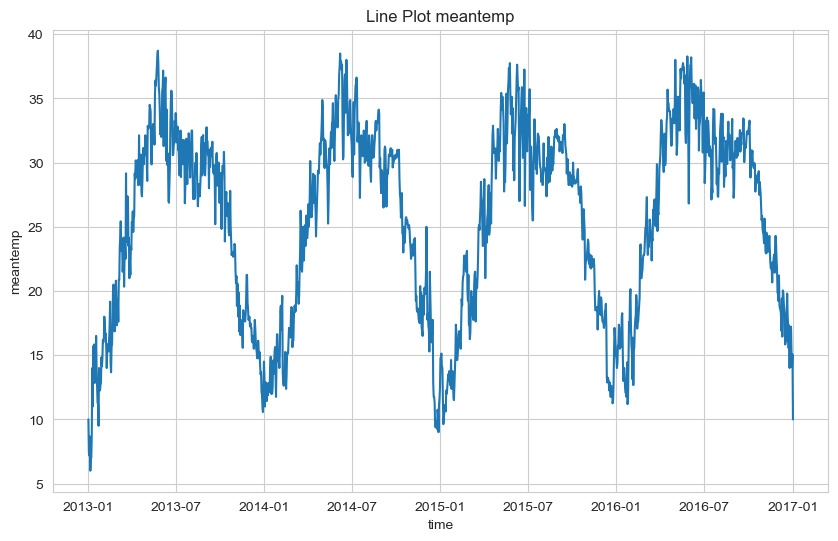

In [8]:
sns.lineplot(data = df, x = df.index, y = 'meantemp')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.title('Line Plot meantemp')
plt.show()

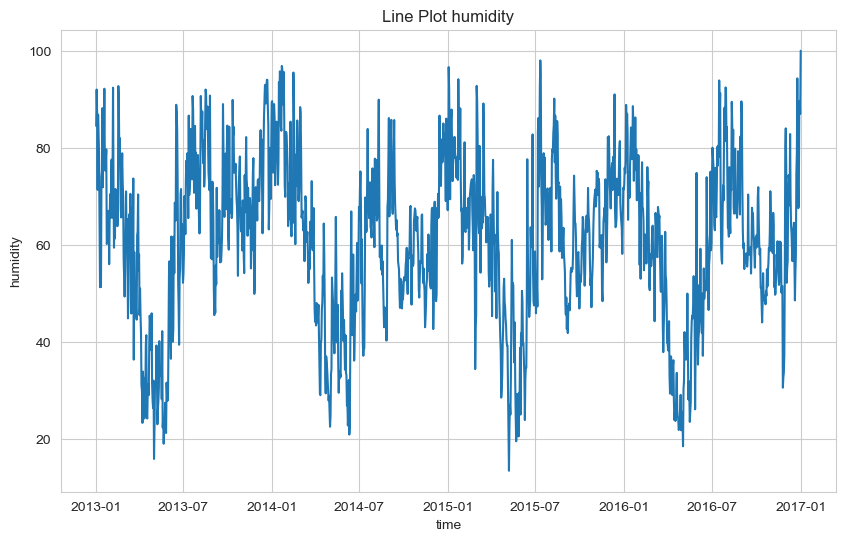

In [9]:
sns.lineplot(data = df, x = df.index, y = 'humidity')
plt.xlabel('time')
plt.ylabel('humidity')
plt.title('Line Plot humidity')
plt.show()

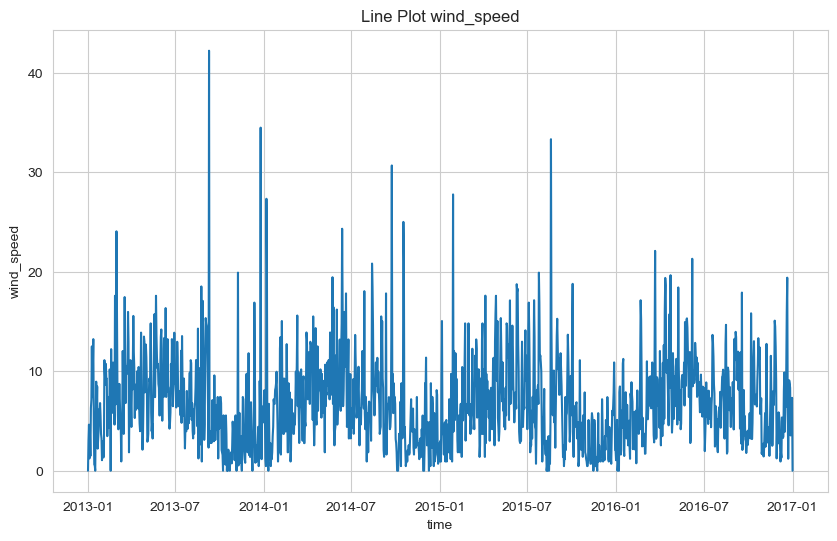

In [10]:
sns.lineplot(data = df, x = df.index, y = 'wind_speed')
plt.xlabel('time')
plt.ylabel('wind_speed')
plt.title('Line Plot wind_speed')
plt.show()

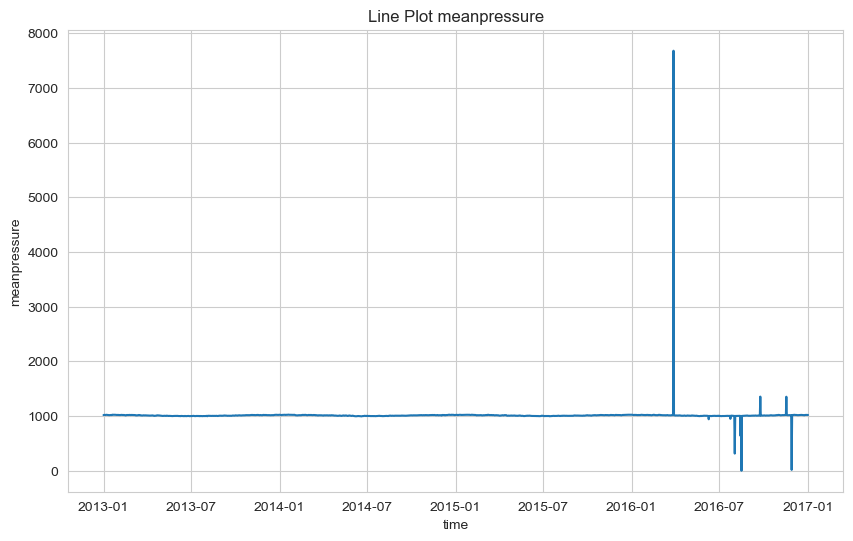

In [11]:
sns.lineplot(data = df, x = df.index, y = 'meanpressure')
plt.xlabel('time')
plt.ylabel('meanpressure')
plt.title('Line Plot meanpressure')
plt.show()

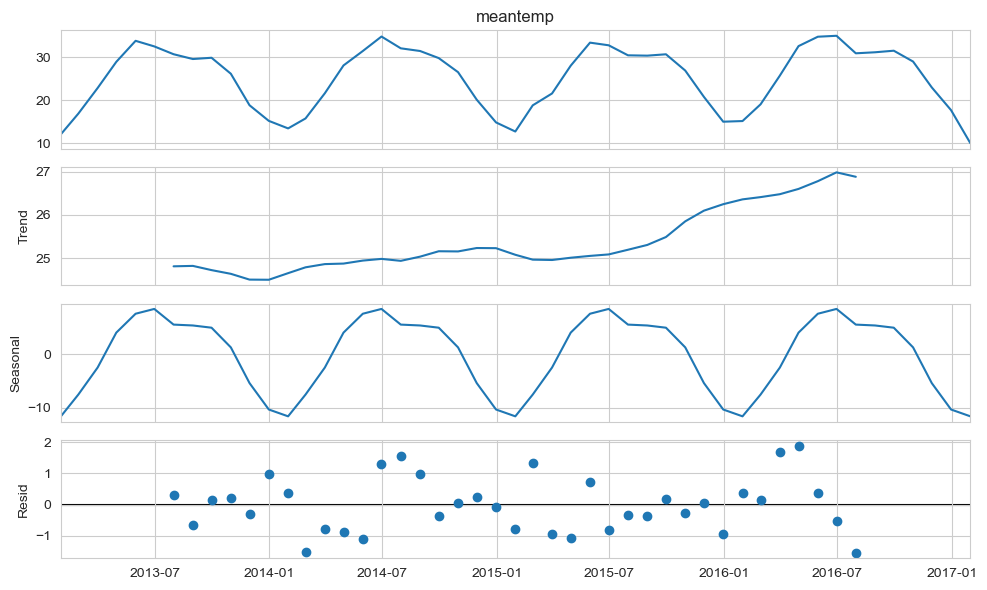

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
data_monthly_meantemp = df['meantemp'].resample('M').mean()
decomposition_meantemp = sm.tsa.seasonal_decompose(data_monthly_meantemp)
fig = decomposition_meantemp.plot()
plt.show()

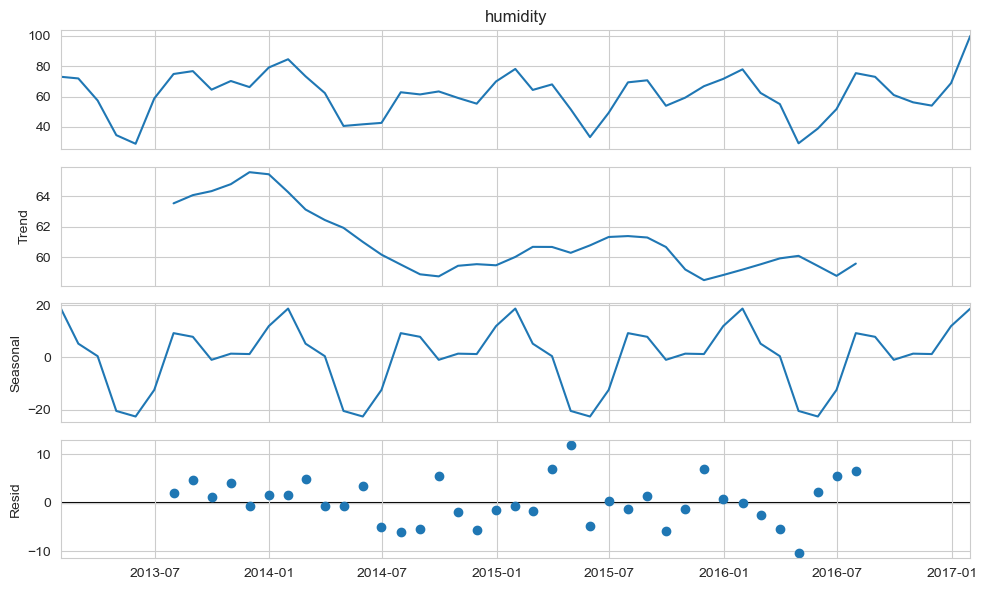

In [13]:
data_monthly_humidity = df['humidity'].resample('M').mean()
decomposition_humidity = sm.tsa.seasonal_decompose(data_monthly_humidity)
fig = decomposition_humidity.plot()
plt.show()

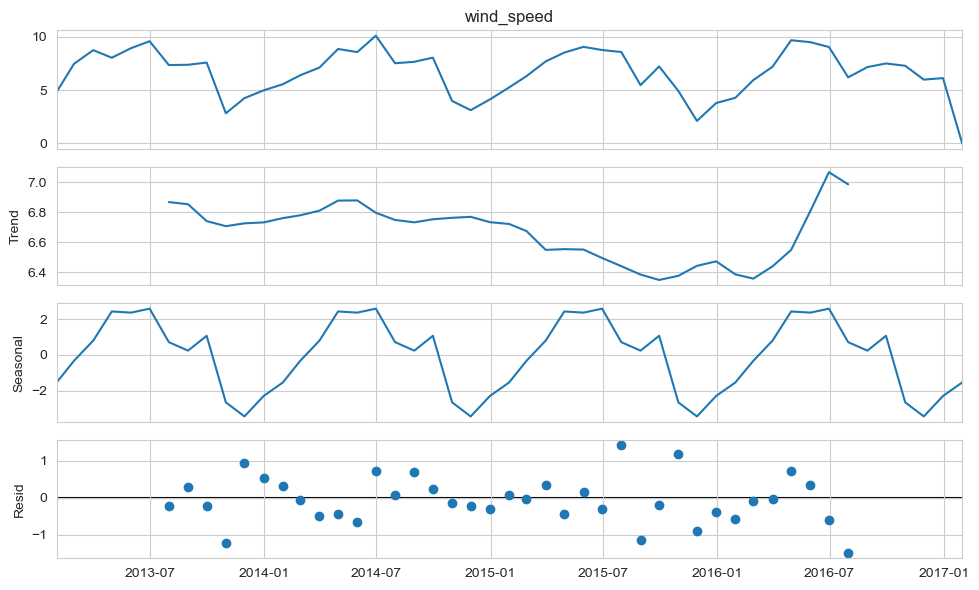

In [14]:
data_monthly_wind_speed = df['wind_speed'].resample('M').mean()
decomposition_wind_speed = sm.tsa.seasonal_decompose(data_monthly_wind_speed)
fig = decomposition_wind_speed.plot()
plt.show()

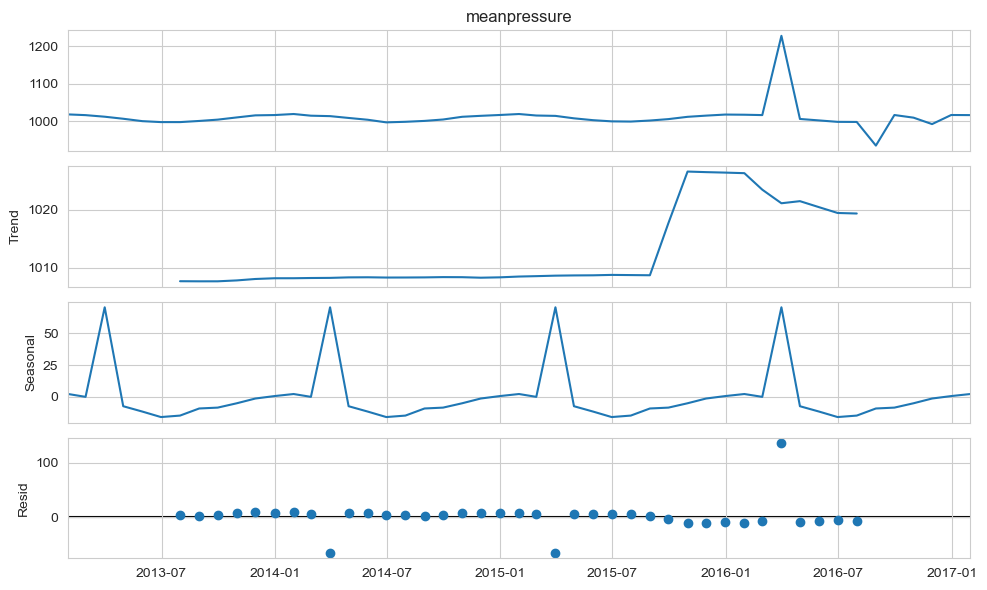

In [15]:
data_monthly_meanpressure = df['meanpressure'].resample('M').mean()
decomposition_meanpressure = sm.tsa.seasonal_decompose(data_monthly_meanpressure)
fig = decomposition_meanpressure.plot()
plt.show()

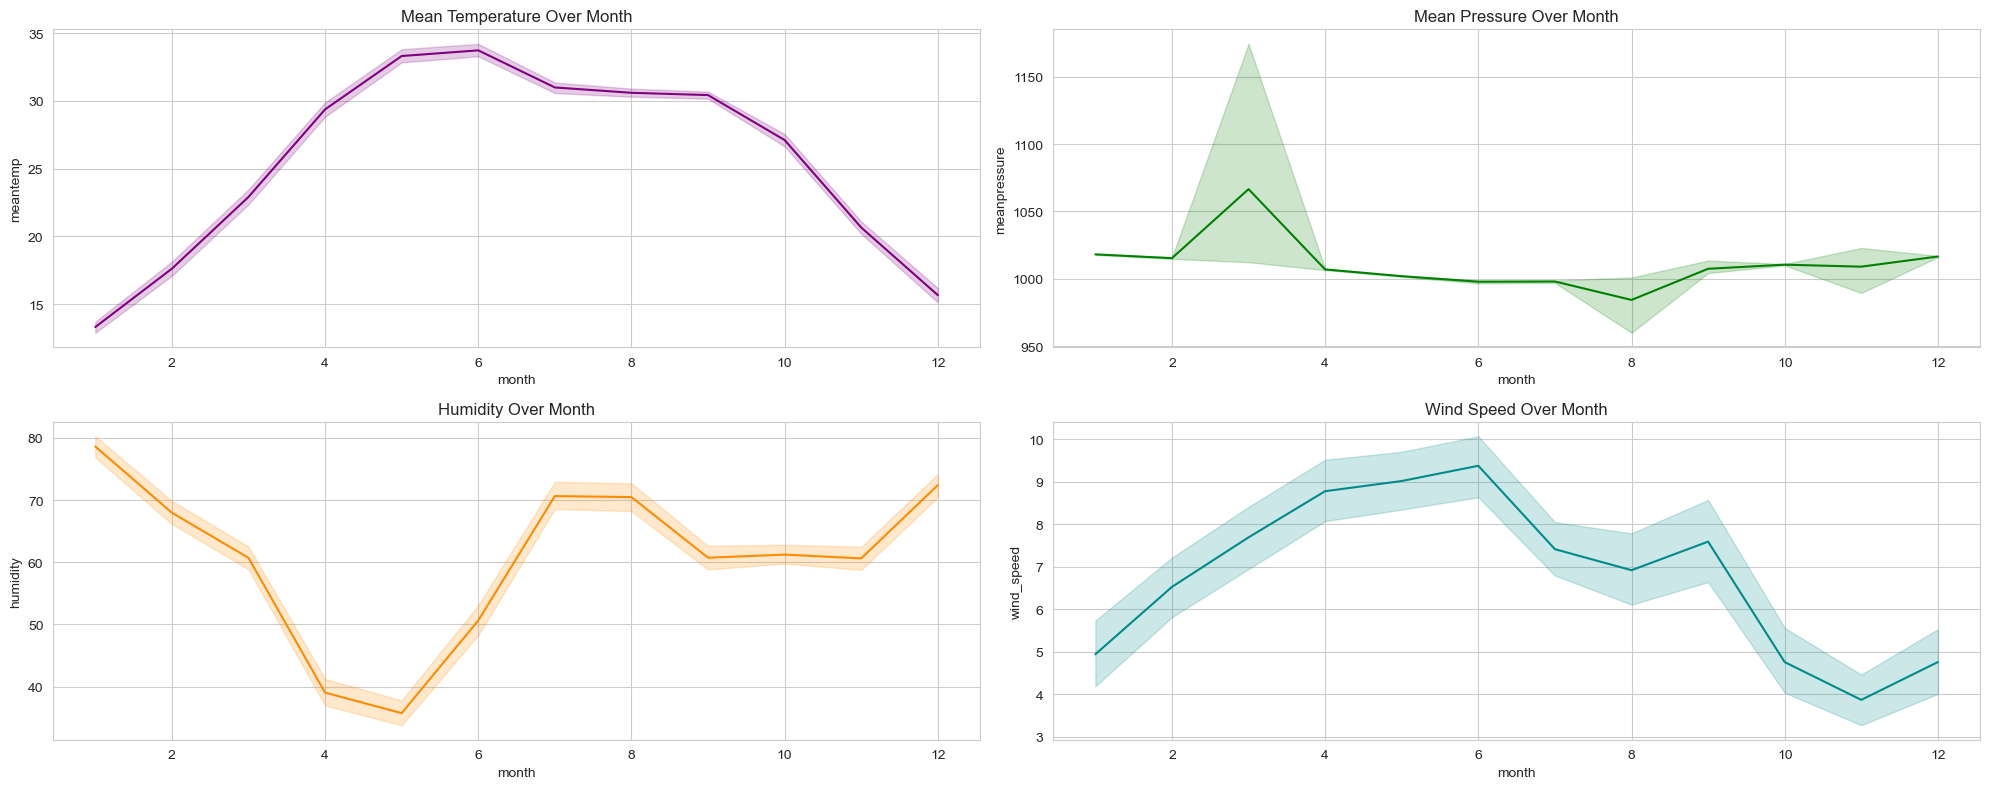

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.set_style('darkgrid')

# Plot each parameter against the 'month'
sns.lineplot(x='month', y='meantemp', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Mean Temperature Over Month')

sns.lineplot(x='month', y='humidity', data=df, color='darkorange', ax=axes[1][0])
axes[1][0].set_title('Humidity Over Month')

sns.lineplot(x='month', y='meanpressure', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Mean Pressure Over Month')

sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan', ax=axes[1][1])
axes[1][1].set_title('Wind Speed Over Month')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Temperature Over the Years')

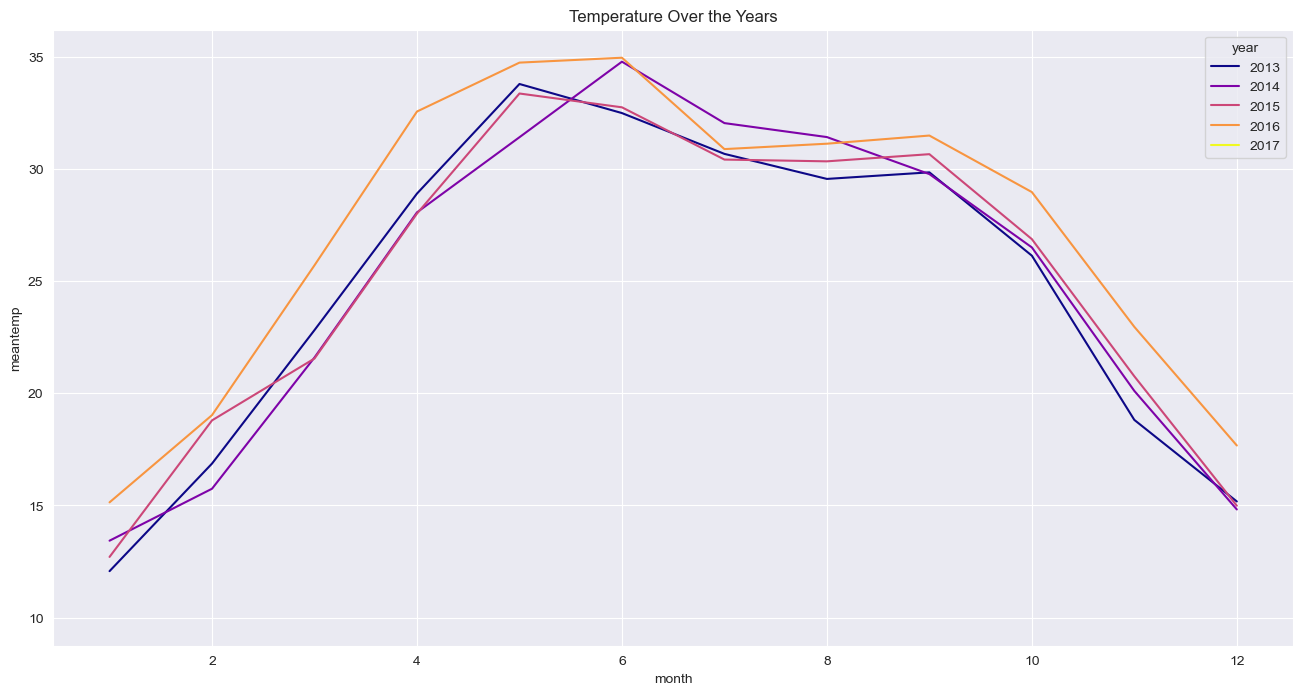

In [17]:
plt.figure(figsize=(16,8))
sns.lineplot(data = df, x = 'month', y = 'meantemp', hue = 'year', palette='plasma', ci = None)
plt.title("Temperature Over the Years")

<Axes: >

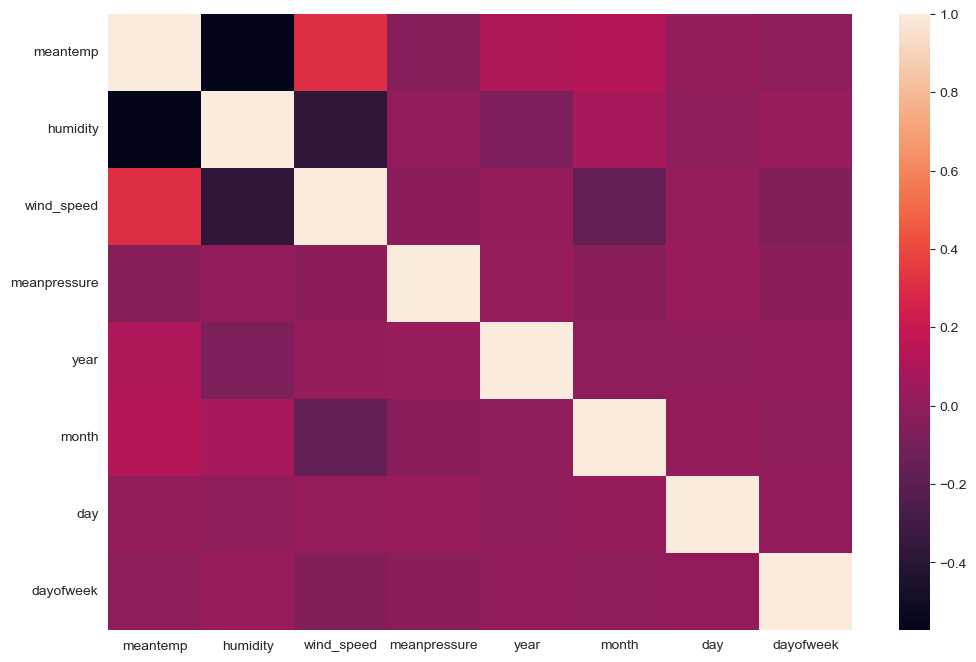

In [18]:
plt.figure(figsize=(12,8))

sns.heatmap(df.select_dtypes('number').corr(), fmt = '.3f')

In [19]:
df.select_dtypes('number').corr()

meantemp  humidity  wind_speed  meanpressure   year  month  \
meantemp         1.000    -0.572       0.306        -0.039  0.104  0.123   
humidity        -0.572     1.000      -0.374         0.002 -0.071  0.075   
wind_speed       0.306    -0.374       1.000        -0.021  0.016 -0.161   
meanpressure    -0.039     0.002      -0.021         1.000  0.023 -0.035   
year             0.104    -0.071       0.016         0.023  1.000 -0.004   
month            0.123     0.075      -0.161        -0.035 -0.004  1.000   
day              0.006    -0.002       0.018         0.036 -0.001  0.012   
dayofweek       -0.010     0.032      -0.053        -0.027  0.005 -0.007   

                day  dayofweek  
meantemp      0.006     -0.010  
humidity     -0.002      0.032  
wind_speed    0.018     -0.053  
meanpressure  0.036     -0.027  
year         -0.001      0.005  
month         0.012     -0.007  
day           1.000      0.002  
dayofweek     0.002      1.000

# box plots

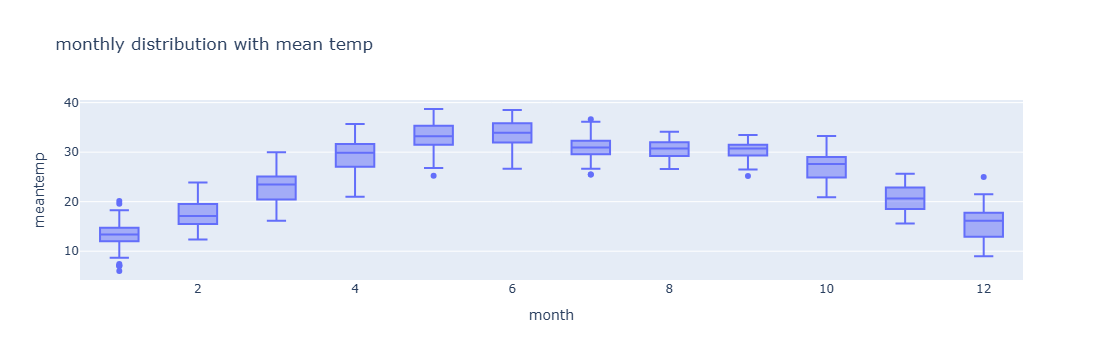

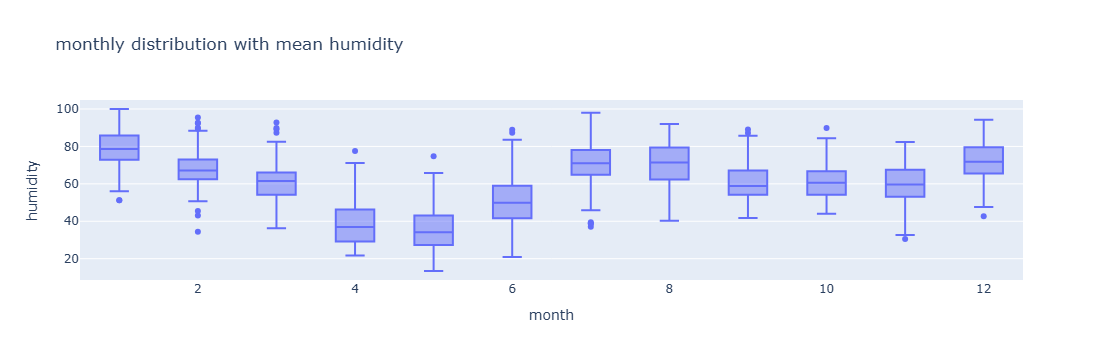

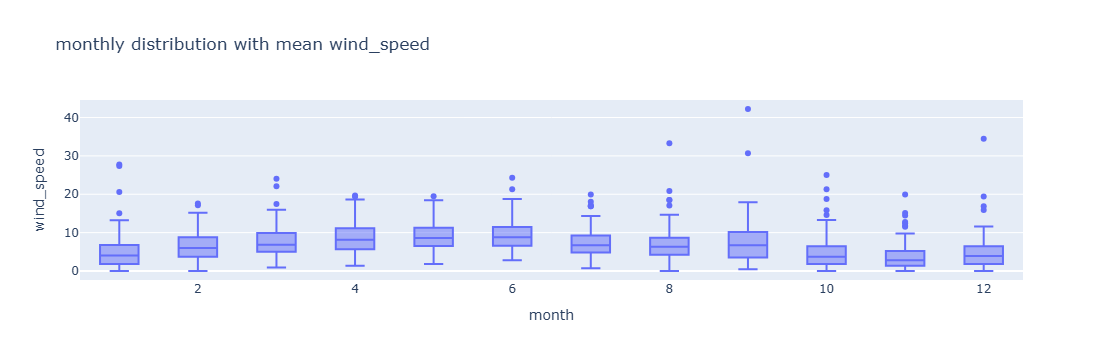

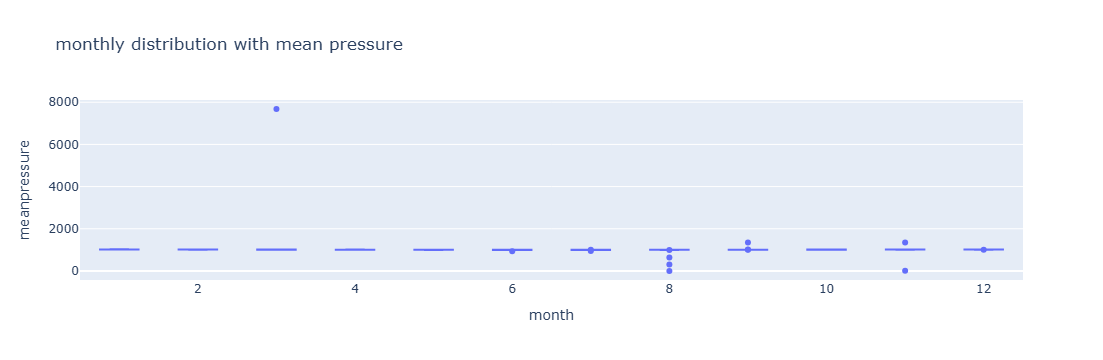

In [20]:
fig = px.box( df, x = 'month', y = 'meantemp', title = 'monthly distribution with mean temp')
fig.show()
fig = px.box(df, x = 'month', y = 'humidity', title = 'monthly distribution with mean humidity')
fig.show()
fig = px.box(df, x = 'month', y = 'wind_speed', title = 'monthly distribution with mean wind_speed')
fig.show()
fig = px.box(df, x = 'month', y = 'meanpressure', title = 'monthly distribution with mean pressure')
fig.show()

In [21]:
df = df[['meantemp','humidity','wind_speed']]	
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

In [22]:
df1 = df.copy()
df1

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700
...              ...       ...         ...
2016-12-28    17.217    68.043       3.548
2016-12-29    15.238    87.857       6.000
2016-12-30    14.095    89.667       6.267
2016-12-31    15.053    87.000       7.325
2017-01-01    10.000   100.000       0.000

[1462 rows x 3 columns]

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    1462 non-null   float64
 1   humidity    1462 non-null   float64
 2   wind_speed  1462 non-null   float64
dtypes: float64(3)
memory usage: 45.7 KB


# STATIONARY CHECKING

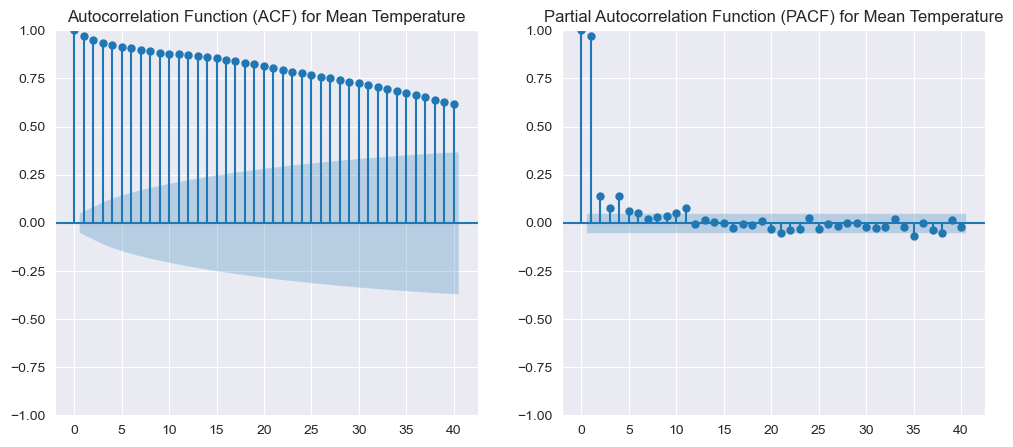

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df1['meantemp'], ax=axes[0], lags=40, title='Autocorrelation Function (ACF) for Mean Temperature')
plot_pacf(df1['meantemp'], ax=axes[1], lags=40, title='Partial Autocorrelation Function (PACF) for Mean Temperature')
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss

In [26]:
def check_stationarity(series):
    print(f'\n___________________Checking Stationarity for: {series.name}___________________\n')
    
    # ADF Test
    adf_test = adfuller(series.values)
    print('ADF Test:\n')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    if (adf_test[1] <= 0.05) & (adf_test[4]['5%'] > adf_test[0]):
        print("\u001b[32mSeries is Stationary (ADF Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (ADF Test)\x1b[0m")
    
    print('\n' + '-'*50 + '\n')

     # KPSS Test
    kpss_test = kpss(series.values, regression='c', nlags='auto')
    print('KPSS Test:\n')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

    if kpss_test[1] > 0.05:
        print("\u001b[32mSeries is Stationary (KPSS Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (KPSS Test)\x1b[0m")

In [28]:
check_stationarity(df1['meantemp'])  
check_stationarity(df1['humidity'])
check_stationarity(df1['wind_speed'])


___________________Checking Stationarity for: meantemp___________________

ADF Test:

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.187864
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: humidity___________________

ADF Test:

ADF Statistic: -3.675577
p-value: 0.004470
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.091737
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: wind_speed___________________

ADF Test:

ADF Statistic: -3.838097
p-value: 0.002541
Critical Values:
	1%: 

C:\Users\richi\AppData\Local\Temp\ipykernel_9508\525484711.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\richi\AppData\Local\Temp\ipykernel_9508\525484711.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\richi\AppData\Local\Temp\ipykernel_9508\525484711.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [29]:
check_stationarity(df1['meantemp'])

df1['meantemp_diff'] = df1['meantemp'].diff().fillna(0)  # diff() default is 1st degree differencing 

print('\n\n############################### After Differencing ###############################\n\n')
check_stationarity(df1['meantemp_diff']);


___________________Checking Stationarity for: meantemp___________________

ADF Test:

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.187864
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


############################### After Differencing ###############################



___________________Checking Stationarity for: meantemp_diff___________________

ADF Test:

ADF Statistic: -16.294070
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.189493
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


C:\Users\richi\AppData\Local\Temp\ipykernel_9508\525484711.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\richi\AppData\Local\Temp\ipykernel_9508\525484711.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




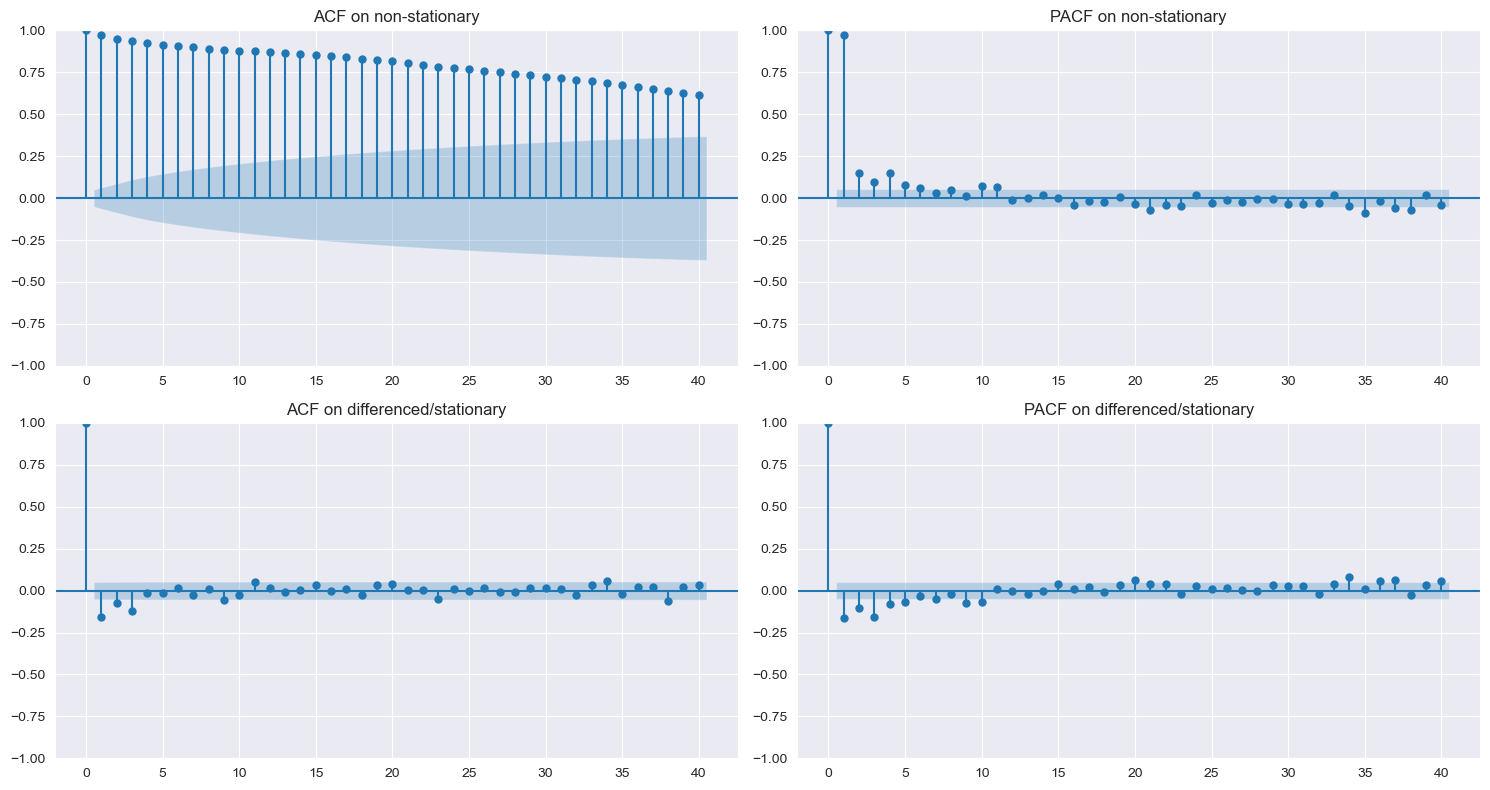

In [30]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

plot_acf(df1['meantemp'], lags=40, ax=ax[0, 0], title='ACF on non-stationary')
plot_pacf(df1['meantemp'], lags=40, ax=ax[0, 1], method='ols', title='PACF on non-stationary')

plot_acf(df1['meantemp_diff'], lags=40, ax=ax[1, 0], title='ACF on differenced/stationary')
plot_pacf(df1['meantemp_diff'], lags=40, ax=ax[1, 1], method='ols', title='PACF on differenced/stationary')

plt.tight_layout()
plt.show()

In [31]:
# Split the data into training and testing sets
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

In [32]:
display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (1169, 4)'

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2013-01-01    10.000    84.500       0.000          0.000
2013-01-02     7.400    92.000       2.980         -2.600
2013-01-03     7.167    87.000       4.633         -0.233
2013-01-04     8.667    71.333       1.233          1.500
2013-01-05     6.000    86.833       3.700         -2.667

'Test shape: (293, 4)'

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598

C:\Users\richi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\richi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\richi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Test MSE: 65.649


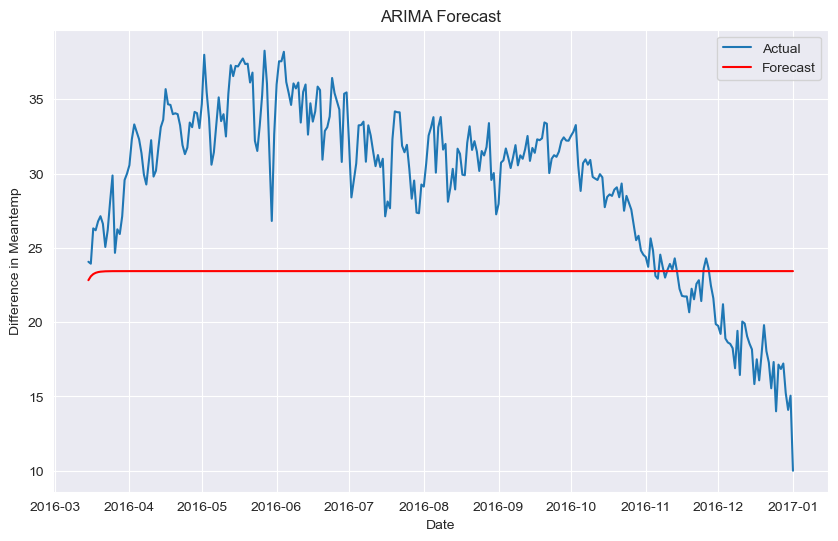

In [34]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['meantemp'], order=(1,1,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate error
error = mean_squared_error(test['meantemp'], arima_pred)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

C:\Users\richi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\richi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\richi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 42.817581559572396
Test R²: -0.337


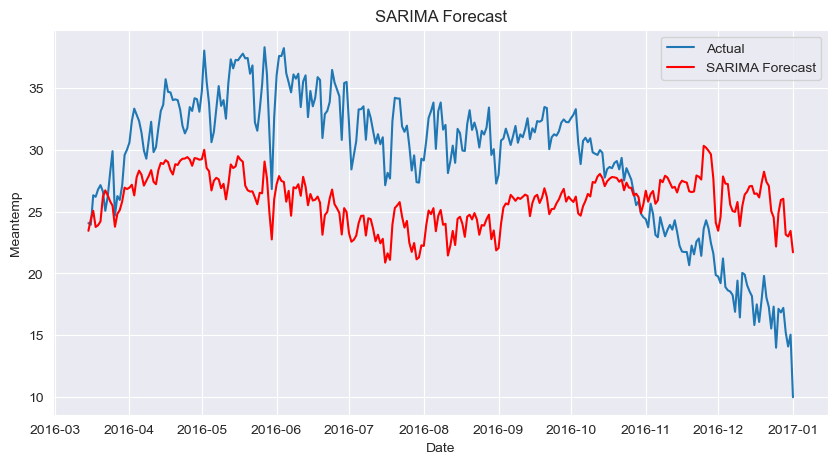

In [35]:
# SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 1, 6)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S)  

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])

# Calculate error
mse = mean_squared_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [37]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 871.5 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 491.5/614.7 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.8 MB 6.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.8 MB 2.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 2.8 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.8 MB 3.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.8 MB 3.4 MB/s eta 0:00:01
   -----

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=104.420, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=100.592, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=104.176, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=106.408, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=100.462, Time=0.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(

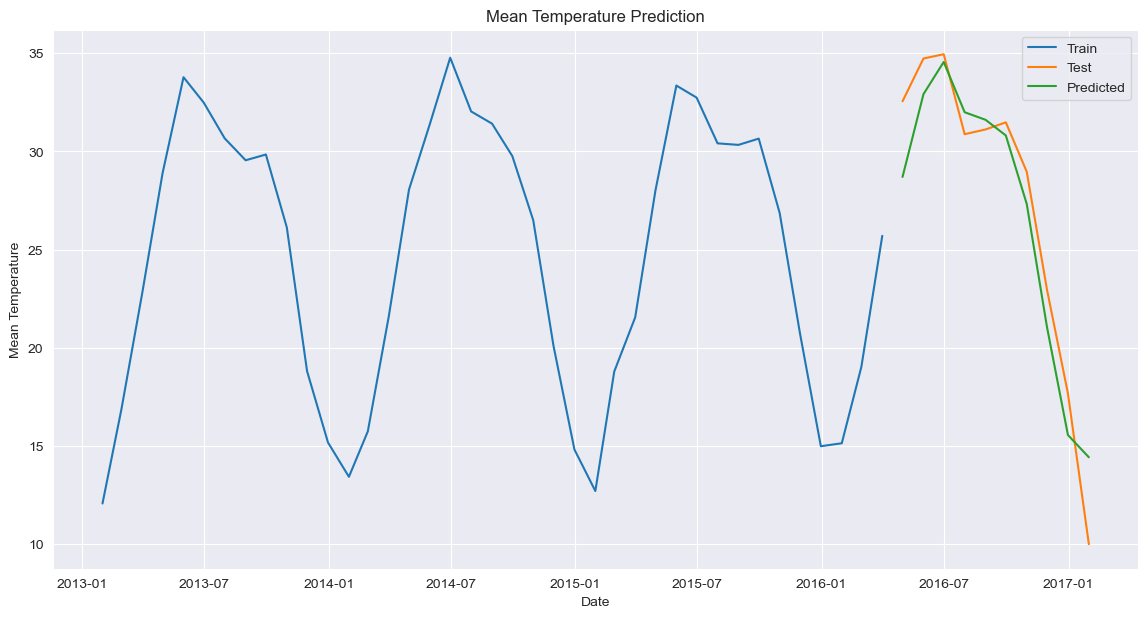

In [39]:
from pmdarima import auto_arima
monthly_df = df1.resample('M').mean()

# Split the data into training and testing sets
train_size = int(len(monthly_df) * 0.8)
m_train, m_test = monthly_df.iloc[:train_size], monthly_df.iloc[train_size:]

# Fit the model on the training data with optimized settings for monthly seasonality
model = auto_arima(
    m_train['meantemp'], 
    seasonal=True, 
    m=12,
    max_p=7, 
    max_d=1, 
    max_q=3, 
    max_P=3, 
    max_D=1, 
    max_Q=2,
    trace=True,    # To print the progress of the fitting
    error_action='ignore',  # Ignore potential errors
    suppress_warnings=True,  # Suppress warnings
    n_jobs=-1  # Use all available CPU cores
)
#Print model summary
print(model.summary())

# Make predictions
n_periods = len(m_test)
auto_arima_pred = model.predict(n_periods=n_periods)

# Calculate R^2 and RMSE
r2 = r2_score(m_test['meantemp'], auto_arima_pred)
rmse = np.sqrt(mean_squared_error(m_test['meantemp'], auto_arima_pred))

print(f'R^2 score: {r2}')
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(m_train.index, m_train['meantemp'], label='Train')
plt.plot(m_test.index, m_test['meantemp'], label='Test')
plt.plot(m_test.index, auto_arima_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Prediction')
plt.show()